In [1]:
import pandas as pd
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('train.csv', header=0, index_col=0)
data.head(10)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
14,NaN,NaN,There's an emergency evacuation happening now ...,1


In [4]:
data[['text']].describe()

,text
count,7613
unique,7503
top,11-Year-Old Boy Charged With Manslaughter of T...
freq,10


In [5]:
data.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [6]:
data.groupby('target').describe()

keyword                          location                        text  \
         count unique          top freq    count unique       top freq count   
target                                                                         
0         4323    218  body%20bags   40     2884   2142  New York   55  4342   
1         3229    220     wreckage   39     2196   1513       USA   67  3271   

                                                                       
       unique                                                top freq  
target                                                                 
0        4315  He came to a land which was engulfed in tribal...    4  
1        3206  11-Year-Old Boy Charged With Manslaughter of T...   10

In [7]:
data['length'] = data['text'].apply(len)

In [8]:
data

,keyword,location,text,target,length
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
14,NaN,NaN,There's an emergency evacuation happening now ...,1,79


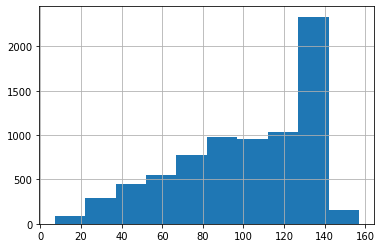

In [9]:
data['length'].hist(bins=10)

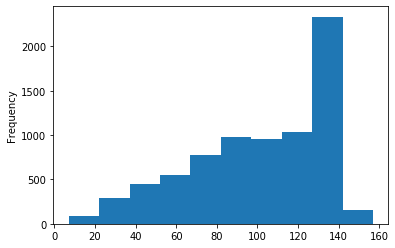

In [40]:
data['length'].plot(bins=10, kind= 'hist')

In [22]:
data[data['length']>=120]['target'].iloc[0]

1

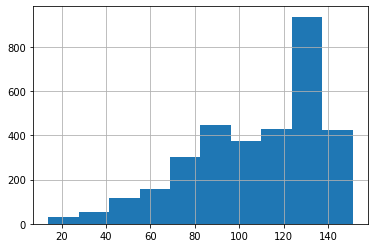

In [41]:
data[data['target']==1]['length'].hist(bins = 10)

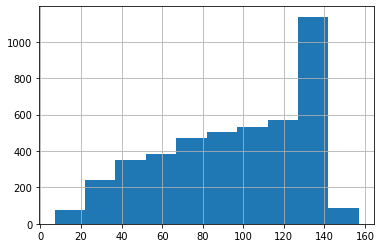

In [42]:
data[data['target']==0]['length'].hist(bins = 10)

# Understanding the technique

In [10]:

#time pass attempt
import string

mess ='I Love football very very very much!!!!! do you love it too???'

clean = [x for x in mess if x not in string.punctuation]

n_clean = "".join(clean)
print(n_clean)

I Love football very very very much do you love it too


In [11]:
from nltk.corpus import stopwords

In [12]:
all_clean = [x for x in n_clean.split() if x.lower() not in stopwords.words('english')]

all_clean

['Love', 'football', 'much', 'love']

In [13]:
# creating a generic function for all the above steps

def text_process(text):
    punc_clean = [x for x in text if x not in string.punctuation]
    
    clean = "".join(punc_clean)
    
    return [y for y in clean.split() if y.lower() not in stopwords.words('english')]

In [10]:
data.head(10)

,keyword,location,text,target,length
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
14,NaN,NaN,There's an emergency evacuation happening now ...,1,79


In [14]:
data = data.iloc[:,2:]

In [15]:
data.head(10)

,text,target,length
id,,,
1,Our Deeds are the Reason of this #earthquake M...,1,69
4,Forest fire near La Ronge Sask. Canada,1,38
5,All residents asked to 'shelter in place' are ...,1,133
6,"13,000 people receive #wildfires evacuation or...",1,65
7,Just got sent this photo from Ruby #Alaska as ...,1,88
8,#RockyFire Update => California Hwy. 20 closed...,1,110
10,#flood #disaster Heavy rain causes flash flood...,1,95
13,I'm on top of the hill and I can see a fire in...,1,59
14,There's an emergency evacuation happening now ...,1,79


# Data text conversion to matrix

In [16]:
data['text'].head(5).apply(text_process)

id
1    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
4        [Forest, fire, near, La, Ronge, Sask, Canada]
5    [residents, asked, shelter, place, notified, o...
6    [13000, people, receive, wildfires, evacuation...
7    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: text, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
?CountVectorizer

In [18]:
bow_transformer  = CountVectorizer(analyzer=text_process).fit(data['text'])  # analyzer will pre process the text column into a required input for countvectorizer

print(len(bow_transformer.vocabulary_))

26473


In [19]:
# to check our vector
data_try = data['text'][5]
data_try

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [20]:
bow_try = bow_transformer.transform([data_try])
print(bow_try)
print(bow_try.shape)

  (0, 11920)	1
  (0, 14502)	1
  (0, 14579)	1
  (0, 22210)	1
  (0, 22300)	1
  (0, 22409)	1
  (0, 22760)	2
  (0, 23526)	1
  (0, 24081)	2
(1, 26473)


In [24]:
print(bow_transformer.get_feature_names()[22760])
print(bow_transformer.get_feature_names()[24081])

place
shelter


In [21]:
text_bow = bow_transformer.transform(data['text'])

In [22]:
print(text_bow.shape)

(7613, 26473)


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tfidf_tranformer = TfidfTransformer().fit(text_bow)
tfidf_text = tfidf_tranformer.transform(text_bow)
tfidf_text.shape
# we can do the fit_transform command also

(7613, 26473)

In [25]:
print(tfidf_tranformer.idf_[bow_transformer.vocabulary_['shelter']])

8.328306024508343


# Model building

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model = MultinomialNB().fit(tfidf_text, data['target'])

In [28]:
predictions = model.predict(bow_try)[0]
predictions

1

In [29]:
tfidf_text.shape

(7613, 26473)

In [30]:
new_predict = model.predict(tfidf_text)

In [31]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(data['target'],new_predict))
print(accuracy_score(data['target'],new_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4342
           1       0.97      0.83      0.89      3271

    accuracy                           0.91      7613
   macro avg       0.93      0.90      0.91      7613
weighted avg       0.92      0.91      0.91      7613

0.9143570208853278


# Creating a pipeline for test train preparations

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('model', MultinomialNB())
])

In [42]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer())])

# test data preparation

In [32]:
test = pd.read_csv('test.csv',header=0, index_col=0)

In [33]:
test.head(10)

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
12,NaN,NaN,We're shaking...It's an earthquake
21,NaN,NaN,They'd probably still show more life than Arse...
22,NaN,NaN,Hey! How are you?
27,NaN,NaN,What a nice hat?


In [34]:
test_new = test.iloc[:,-1]

In [35]:
test_new.head(10)

id
0                    Just happened a terrible car crash
2     Heard about #earthquake is different cities, s...
3     there is a forest fire at spot pond, geese are...
9              Apocalypse lighting. #Spokane #wildfires
11        Typhoon Soudelor kills 28 in China and Taiwan
12                   We're shaking...It's an earthquake
21    They'd probably still show more life than Arse...
22                                    Hey! How are you?
27                                     What a nice hat?
29                                            Fuck off!
Name: text, dtype: object

In [36]:
test_bow = bow_transformer.transform(test_new) # not to fit on test data only use transform
print(test_bow.shape)

(3263, 26473)


In [37]:
test_tfidf = tfidf_tranformer.transform(test_bow)

In [81]:
test_tfidf.shape

(3263, 26473)

In [38]:
pred = model.predict(test_tfidf)

In [88]:
pred = pd.DataFrame(pred)

In [89]:
pred.to_csv('Final.csv')

# Extra tree Classifier

In [39]:

from sklearn.ensemble import ExtraTreesClassifier
 
model_ETC=ExtraTreesClassifier(100,random_state=10)
#fit the model on the data and predict the values
model_ETC=model_ETC.fit(tfidf_text, data['target'])
 

 
 

 


In [42]:
new_predict1 = model_ETC.predict(tfidf_text)

In [43]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(data['target'],new_predict1))
print(accuracy_score(data['target'],new_predict1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4342
           1       1.00      0.99      1.00      3271

    accuracy                           1.00      7613
   macro avg       1.00      1.00      1.00      7613
weighted avg       1.00      1.00      1.00      7613

0.9965847891764088


In [51]:
#test predictions
pred1 = model_ETC.predict(test_tfidf)

In [52]:
pred1 = pd.DataFrame(pred1)

In [53]:
pred1.to_csv('Final_1.csv')

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

#create model
classifier = LogisticRegression()

#fitting training data to the model
classifier.fit(tfidf_text, data['target'])

Y_pred=classifier.predict(test_tfidf)

print(classifier.coef_)
print(classifier.intercept_)

C:\Users\Agradeep Sengupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 0.61716407  0.07426637  0.19146338 ... -0.17043774  0.11575653
   0.1509802 ]]
[-0.47191135]


In [49]:
Y_pred = pd.DataFrame(Y_pred)

In [50]:
Y_pred.to_csv('last.csv')

# Gradient Boosting

In [54]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier
 
model_GradientBoosting=GradientBoostingClassifier(n_estimators=270, #default n_estimators=100
                                                  random_state=10)
 
#fit the model on the data and predict the values
model_GradientBoosting.fit(tfidf_text, data['target'])
 


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=270,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
pd = model_GradientBoosting.predict(tfidf_text)

In [56]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(data['target'],pd))
print(accuracy_score(data['target'],pd))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4342
           1       0.96      0.60      0.73      3271

    accuracy                           0.81      7613
   macro avg       0.86      0.79      0.80      7613
weighted avg       0.85      0.81      0.80      7613

0.8145277814265073


In [57]:
pred_gb=model_GradientBoosting.predict(test_tfidf)

In [61]:
pred_gb = pd.DataFrame(pred_gb)

In [62]:
pred_gb.to_csv("GB_Final.csv")

# Random Forest

In [63]:
#predicting using the Random_Forest_Classifier
##Accuracy obtained= 98.26
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=101,random_state=10)
 
#fit the model on the data and predict the values
model_RandomForest.fit(tfidf_text, data['target'])
 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [67]:
pred_rt=model_RandomForest.predict(tfidf_text)

In [68]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(data['target'],pred_rt))
print(accuracy_score(data['target'],pred_rt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4342
           1       1.00      0.99      1.00      3271

    accuracy                           1.00      7613
   macro avg       1.00      1.00      1.00      7613
weighted avg       1.00      1.00      1.00      7613

0.996453434913963


In [64]:
pred_rt=model_RandomForest.predict(test_tfidf)

In [65]:
pred_rt = pd.DataFrame(pred_rt)

In [66]:
pred_rt.to_csv('RT_final.csv')

# New attempt

In [3]:
data = pd.read_csv('train.csv', header=0, index_col=0)
data.head(10)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
14,NaN,NaN,There's an emergency evacuation happening now ...,1


In [4]:
import string
from nltk.corpus import stopwords

In [5]:
# creating a generic function for all the above steps

def text_process(text):
    punc_clean = [x for x in text if x not in string.punctuation]
    
    clean = "".join(punc_clean)
    
    return [y for y in clean.split() if y.lower() not in stopwords.words('english')]

In [6]:
data = data.iloc[:,2:]

In [7]:
data['text'].head(5).apply(text_process)

id
1    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
4        [Forest, fire, near, La, Ronge, Sask, Canada]
5    [residents, asked, shelter, place, notified, o...
6    [13000, people, receive, wildfires, evacuation...
7    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: text, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
bow_transformer  = CountVectorizer(analyzer=text_process).fit(data['text'])  # analyzer will pre process the text column into a required input for countvectorizer

print(len(bow_transformer.vocabulary_))

26473


In [10]:
text_bow = bow_transformer.transform(data['text'])

In [11]:
print(text_bow.shape)

(7613, 26473)


# Model building

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
model = MultinomialNB().fit(text_bow, data['target'])

In [14]:
new_predict = model.predict(text_bow)

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(data['target'],new_predict))
print(accuracy_score(data['target'],new_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4342
           1       0.95      0.89      0.92      3271

    accuracy                           0.93      7613
   macro avg       0.94      0.93      0.93      7613
weighted avg       0.94      0.93      0.93      7613

0.9340601602522002


# Test preparation

In [16]:
test = pd.read_csv('test.csv',header=0, index_col=0)

In [17]:
test_new = test.iloc[:,-1]

In [18]:
test_bow = bow_transformer.transform(test_new) # not to fit on test data only use transform
print(test_bow.shape)

(3263, 26473)


In [19]:
pred = model.predict(test_bow)

In [20]:
pred = pd.DataFrame(pred)

In [21]:
pred.to_csv('New_final.csv')

In [22]:
# Decision Tree Classifier

In [23]:

from sklearn.tree import DecisionTreeClassifier

##Creating model object
model_DT=DecisionTreeClassifier(criterion="gini", random_state=10)




##Train the model
model_DT.fit(text_bow, data['target'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [24]:
DT_pred = model_DT.predict(test_bow)

In [25]:
DT_pred = pd.DataFrame(DT_pred)

In [26]:
DT_pred.to_csv('DT_Final.csv')

In [27]:
# Extra tree Classifier

In [28]:

from sklearn.ensemble import ExtraTreesClassifier
 
model_ETC=ExtraTreesClassifier(100,random_state=10)
#fit the model on the data and predict the values
model_ETC=model_ETC.fit(text_bow, data['target'])
 

 
 

 


In [29]:
ET_pred = model_ETC.predict(test_bow)

In [30]:
ET_pred = pd.DataFrame(ET_pred)

In [31]:
ET_pred.to_csv('ET_Final.csv')